# Machine Learning Assignment 1

*this is a group project*


## PROBLEM 1 QUESTION 1

 θ(vector) estimation using least squares:

 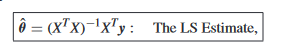

x vector values are generated as equidistant points in [0,2] and y vector using the given model and given values of θ.

X (capital), also called Φ(x), is a matrix containing all the values of the functions of x that make up the prediction model. In this case Χ containts:
1 (x^0), x^1, x^2, x^3, x^5

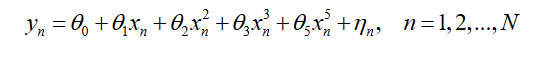

Noise is modeled as a gaussian distribution with zero mean and variance = 0.1 and is added to the training observations as random values belonging to this distribution.

MSE: 0.030534438582444885


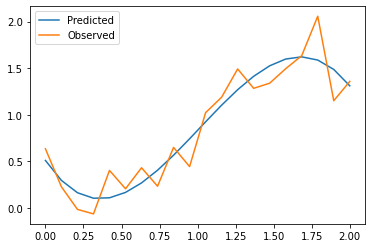

In [ ]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt
from numpy.linalg import inv

n = 20
i = 0
x = []

while i <= 2: #this loop is used to generate 20 X values including 0 and 2
    x.append(i)
    i = i + 2/(n-1)

y = []
y_true = []
for i in range(n): #for every value in x vector, a y value is generated using the given model
    y.append(0.2 -1*x[i] + 0.9*(x[i]**2) + 0.7*(x[i]**3) - 0.2*(x[i]**5) + np.random.normal(0, math.sqrt(0.1)))
    y_true.append(0.2 -1*x[i] + 0.9*(x[i]**2) + 0.7*(x[i]**3) - 0.2*(x[i]**5))
f = []
for i in range(n): #f matrix containts all the values of  x, x^2, x^3, x^5
    f.append([x[i]**0, x[i] , x[i]**2 , x[i]**3, x[i]**5])

matrix_f = np.array(f) #f is Φ(x) matrix with dimensions 5 (for the 5 different functions of x in our model) X 20 (for each of the 20 points)
matrix_tp = matrix_f.transpose()

c = np.matmul(np.matmul( inv(np.matmul(matrix_tp,matrix_f)) , matrix_tp), y)  #c vector is the estimate of θ using least squares

y_model = []

for i in range(n):
    y_model.append(c[0] + c[1]*x[i] + c[2]*x[i]**2 + c[3]*x[i]**3 + c[4]*x[i]**5)  #y_model stores the values of our predictions about y for each of the n points
plt.plot(x,y_model, label='Predicted')
plt.plot(x,y, label='Observed') #plotting both noisy observations of the training set and the predicted model which is the smooth curve
plt.legend()

mse = 0
for i in range(n):
    mse = mse + (y_true[i] - y_model[i])**2 #calculating the mean square error of y over the test set
mse = mse/n
print("MSE:", mse)

We are now creating test set comprising of 1000 points randomly selected in the interval [0,2] and we use the model with the estimate of the parameter vector we got using the Least Squares method on our training set.


In [ ]:
n = 1000
i = 0
x_test = []

for i in range(n):
  x_test.append(random.uniform(0,2)) #the test set is 1000 randomly selected points in [0,2]

y_test = []
y_test_model = []
for i in range(n):
    y_test.append(0.2 -1*x_test[i] + 0.9*(x_test[i]**2) + 0.7*(x_test[i]**3) - 0.2*(x_test[i]**5) + np.random.normal(0, math.sqrt(0.1)))  #for every value in x_test vector, a y_test value is generated using the given θ values and noise
    y_test_model.append(c[0] + c[1]*x_test[i] + c[2]*x_test[i]**2 + c[3]*x_test[i]**3 + c[4]*x_test[i]**5)  #y_test_model values are generated with the predicted θ values


mse = 0
for i in range(n):
   mse = mse + (y_test[i] - y_test_model[i])**2
mse = mse/n
print("MSE:", mse)

MSE: 0.1359806300079696


## PROBLEM 1 QUESTION 2

Least squares is used again to estimate parameter vector θ.
In this case prediction models will be different (2nd and 10th degree) so Φ(x) and predicted θ will be of different dimensions.

From the book:
"For a fixed number of training points, N, in the data sets D, trying to minimize the variance term results in an increase of the bias term and vice versa. This is because, in order to reduce
the bias term, one has to increase the complexity (more free parameters) of the adopted estimator.
This, in turn, results in higher variance as we change the training sets."

In this case, the 2nd degree model "being further away" from the true model, as was expected, shows greater bias than the 10th degree model (2nd degree polynomials have a constant 2nd derivative and thus can't appear wavy like our true model).
In turn the variance term seems greater for the 10th degree model which is overfitted in the observed values for each experiment.

Variance note: It seems that the values of variance get greater near the edges of [0,2]. This is because the value of y changes dramatically for these high power polynomials outside the range [0,2].

2nd Degree Polynomial MSE: 0.31359286186579327
10th Degree Polynomial MSE: 0.06334286625736807


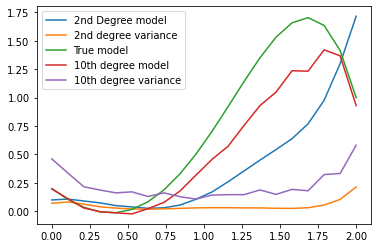

In [ ]:
import numpy as np
import math
from numpy.linalg import inv
n = 20
i = 0
x = []
while i <= 2:   #again generating x vector same as question 1
    x.append(i)
    i = i + 2/(n-1)

y_true = []    #y_true vector stores the values of the real model without the noise and is used only as a comparison in the graph as it is
for j in range(n):
    y_true.append(0.2 -1*x[j] + 0.9*(x[j]**2) + 0.7*(x[j]**3) - 0.2*(x[j]**5))

y_model = np.zeros((n,100))   #initializing the matrices
y_model_sums = np.zeros((n))
y = np.zeros((n,100))
f = []

for i in range(n):
    f.append([x[i]**0,  x[i] , x[i]**2])  #f stores Φ(x) values in a list and is then converted into a matrix (matrix_f). In this case the model is 2nd degree polynomial
matrix_f = np.array(f)
matrix_tp = matrix_f.transpose()  #matrix_tp stores matrix_f transpose matrix and is used to simpify the following expressions of c

for i in range(100):
    for j in range(n):
        y[j][i] = (0.2 -1*x[j] + 0.9*(x[j]**2) + 0.7*(x[j]**3) - 0.2*(x[j]**5) + np.random.normal(0, math.sqrt(0.1)))  #y stores all the different values of observed y over the 100 experiments. each experiment is different because of randomness in the noise
        c = np.matmul(np.matmul( inv(np.matmul(matrix_tp,matrix_f)) , matrix_tp), y) #same as question 1, θ vector is calculated for each experiment in 100 loops and used directly to calculate y_model
        y_model[j][i] = (c[0][i] + c[1][i]*x[j] + c[2][i]*x[j]**2) #y_model stores all the different values of predicted y over the 100 experiments
        y_model_sums[j] = y_model_sums[j] + y_model[j][i] #y_model_sums adds the value for the same x in every experiment so as to calculate their mean in the next step and store it in model_mean
model_mean =  y_model_sums/100

var = np.zeros((n)) #initializing variance vector
for i in range(100):
    for j in range(n):
        var[j] = var[j] + (y_model[j][i]-model_mean[j])**2  #variance is calculated for every value of x over 100 experiments
var = var/n
plt.plot(x, model_mean, label='2nd Degree model')
plt.plot(x, var, label = '2nd degree variance')
plt.plot(x, y_true, label = 'True model')

mse = 0
for i in range(n):
   mse = mse + (model_mean[i] - y_true[i])**2
mse = mse/n
print("2nd Degree Polynomial MSE:", mse)


#exactly the same method is applied for the new prediction model (10th degree polynomial). Matrices and variables are initialized and reused
y_model = np.zeros((n,100))
y_model_sums = np.zeros((n))
y = np.zeros((n,100))
f = []

for i in range(n):
    f.append([x[i]**0, x[i], x[i]**2, x[i]**3, x[i]**4, x[i]**5, x[i]**6, x[i]**7, x[i]**8, x[i]**9, x[i]**10])
matrix_f = np.array(f)
matrix_tp = matrix_f.transpose()

for i in range(100):
    for j in range(n):
        y[j][i] = (0.2 -1*x[j] + 0.9*(x[j]**2) + 0.7*(x[j]**3) - 0.2*(x[j]**5) + np.random.normal(0, math.sqrt(0.1)))


        c = np.matmul(np.matmul( inv(np.matmul(matrix_tp,matrix_f)) , matrix_tp), y)
        y_model[j][i] = (c[0][i] + c[1][i]*x[j] + c[2][i]*x[j]**2 + c[3][i]*x[j]**3 + c[4][i]*x[j]**4 + c[5][i]*x[j]**5 + c[6][i]*x[j]**6 + c[7][i]*x[j]**7 + c[8][i]*x[j]**8 + c[9][i]*x[j]**9 + c[10][i]*x[j]**10)
        y_model_sums[j] = y_model_sums[j] + y_model[j][i]
model_mean = y_model_sums/100

ar = np.zeros((n))
for i in range(100):
    for j in range(n):
        var[j] = var[j] + (y_model[j][i]-model_mean[j])**2
var = var/n
plt.plot(x,model_mean, label='10th degree model')
plt.plot(x,var, label='10th degree variance')
plt.legend()

mse = 0
for i in range(n):
   mse = mse + (model_mean[i] - y_true[i])**2
mse = mse/n
print("10th Degree Polynomial MSE:", mse)


## PROBLEM 1 QUESTION 3

The solution is the same as question 1 by just adding the regularization term.

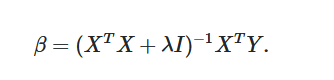

In [ ]:
n = 20
i = 0
x = []
while i <= 2:
    x.append(i)
    i = i + 2/(n-1)

y = []
y_true=[]
for i in x:
    y.append(0.2 -1*i + 0.9*(i**2) + 0.7*(i**3) - 0.2*(i**5) + np.random.normal(0, math.sqrt(0.1)))
    y_true.append(0.2 -1*i + 0.9*(i**2) + 0.7*(i**3) - 0.2*(i**5))

a = []
for i in range(n):
    a.append([x[i]**0, x[i], x[i]**2, x[i]**3, x[i]**5])

matrix = np.array(a)
matrix_tp = matrix.transpose()
ident = np.identity(5)


y_pred = np.zeros((20))
#λ values range arbitrarily from 10^(-4) to 10^4
for i in range(-4,4,1):
    mse=0
    el = 10^i
    c = np.matmul(np.matmul( inv(np.matmul(matrix_tp,matrix)+ el*ident) , matrix_tp), y)
    for j in range(n):
      y_pred[j]=(c[0] + c[1]*x[i] + c[2]*x[i]**2 + c[3]*x[i]**3 + c[4]*x[i]**5)
      mse = mse + (y_true[j]-y_pred[j])**2
    mse = mse/n
    print("MSE for λ = 10^(", i, "):", mse)

MSE for λ = 10^( -4 ): 0.8236990221789775
MSE for λ = 10^( -3 ): 0.712407600837363
MSE for λ = 10^( -2 ): 0.6152185702125522
MSE for λ = 10^( -1 ): 0.48052294112371313
MSE for λ = 10^( 0 ): 0.8326476341034585
MSE for λ = 10^( 1 ): 0.8026133352819735
MSE for λ = 10^( 2 ): 0.7849206291115534
MSE for λ = 10^( 3 ): 0.7340256150775757


## PROBLEM 1 QUESTION 4

In the previous questions the task was to predict the values of y by giving as an output just one value as a result of our estimation method. In Bayesian Inference the prediction is a distribution of which the most probable value is given as an output along with the predicted variance (in Gaussians, the most probable value coincides with its mean).

Equations used:

First step is to get an estimate of the posterior by utilizing our prior knowledge G(θ), given model Φ(x) and noise assumptions. N = 20 for the training set.

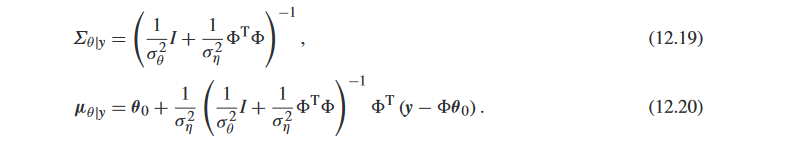

Here φ(x) is considered the line of matrix Φ which corresponds to each x value. With bayesian inference, a predicted distribution for y is inferred and the following equations estimate the mean and variance of this distribution.


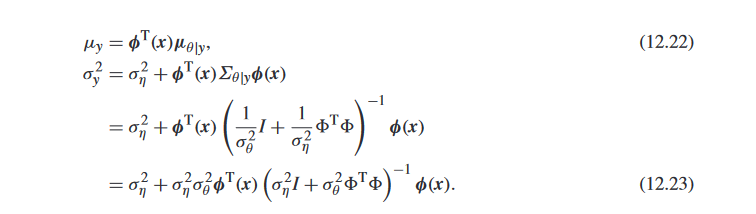

MSE: 0.0011691677806424884


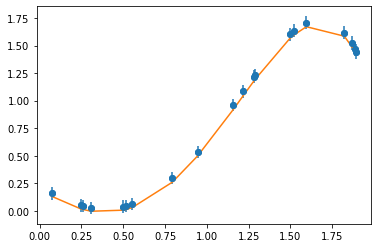

In [ ]:
n = 20
i = 0
x = []
while i <= 2:
    x.append(random.uniform(0,2))  #training set here is 20 randomly selected points in [0,2]
    i = i + 2/(n-1)
x = np.sort(x)    #sorting the x vector to make it easier to plot
y = []
y_true=[]  #will plot the true model as well for comparison
for i in x:
    y.append(0.2 -1*i + 0.9*(i**2) + 0.7*(i**3) - 0.2*(i**5) + np.random.normal(0, math.sqrt(0.1)))  #training y vector, generated the same as in the previous questions
    y_true.append(0.2 -1*i + 0.9*(i**2) + 0.7*(i**3) - 0.2*(i**5))
a = []
for i in range(n):
    a.append([x[i]**0, x[i], x[i]**2, x[i]**3, x[i]**5])  #creating Φ matrix
a_m = np.array(a)
a_tp = a_m.transpose()
u0 = [0.2, -1, 0.9, 0.7, -0.2]  #mean of G(θ) which encodes our prior knowledge about θ
sU = 0.1   #sU=σθ^2
sH = 0.05  #sH=ση^2
ident = np.identity(5)  #identity matrix 5x5, as Φ has 5 columns

mean_u = u0 + np.matmul((1/sH*np.matmul(inv(1/sH*ident+ 1/sH*np.matmul(a_tp,a_m)),a_tp)),(y - np.matmul(a_m,u0))) #eq 12.20
cov_pr = inv(1/sH*ident+ 1/sH*np.matmul(a_tp,a_m)) #eq 12.19
#mean_u and cov_pr is the estimate for the posterior distr. mean and variance will be used to make a prediction about y

y_pred = []
cov_pred = []
x_plot = []
for i in range(n):
    a_pred = [x[i]**0, x[i], x[i]**2, x[i]**3, x[i]**5]  #here, a_pred is the same as φ(x)
    a_m_pred = np.array(a_pred)
    a_pred_tp = a_m_pred.transpose()
    y_pred.append(np.matmul(a_m_pred, mean_u))
    cov_pred.append(sH + np.matmul(np.matmul(a_pred_tp,cov_pr),a_m_pred))
    x_plot.append(x[i])

mse = 0
for i in range(n):
   mse = mse + (y_pred[i] - y_true[i])**2
mse = mse/n
print("MSE:", mse)

plt.scatter(x,y_pred)
plt.errorbar(x,y_pred, yerr = cov_pred, fmt='o')
plt.plot(x,y_true)
plt.show()

MSE: 0.02068379700604166


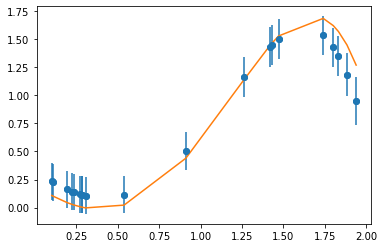

In [ ]:
#exact same task with sH=0.15
n = 20
i = 0
x = []
while i <= 2:
    x.append(random.uniform(0,2))  #training set here is 20 randomly selected points in [0,2]
    i = i + 2/(n-1)
x = np.sort(x)    #sorting the x vector to make it easier to plot
y = []
y_true=[]  #will plot the true model as well for comparison
for i in x:
    y.append(0.2 -1*i + 0.9*(i**2) + 0.7*(i**3) - 0.2*(i**5) + np.random.normal(0, math.sqrt(0.1)))  #training y vector generated same as previous questions
    y_true.append(0.2 -1*i + 0.9*(i**2) + 0.7*(i**3) - 0.2*(i**5))
a = []
for i in range(n):
    a.append([x[i]**0, x[i], x[i]**2, x[i]**3, x[i]**5])  #creating Φ matrix
a_m = np.array(a)
a_tp = a_m.transpose()
u0 = [0.2 , -1, 0.9 , 0.7, -0.2]  #mean of G(θ) which encodes our prior knowledge about θ
sU = 0.1   #sU=σθ^2
sH = 0.15  #sH=ση^2
ident = np.identity(5)  #identity matrix 5x5, as Φ has 5 columns

mean_u = u0 + np.matmul((1/sH*np.matmul(inv(1/sH*ident+ 1/sH*np.matmul(a_tp,a_m)),a_tp)),(y - np.matmul(a_m,u0)))   #eq 12.20
cov_pr = inv(1/sH*ident+ 1/sH*np.matmul(a_tp,a_m)) #eq 12.19
#mean_u and cov_pr is the estimate for the posterior distr. mean and variance will be used to make a prediction about y

y_pred = []
cov_pred = []
x_plot = []
for i in range(n):
    a_pred = [x[i]**0, x[i], x[i]**2, x[i]**3, x[i]**5]  #here a_pred is the same as φ(x)
    a_m_pred = np.array(a_pred)
    a_pred_tp = a_m_pred.transpose()
    y_pred.append(np.matmul(a_m_pred, mean_u))
    cov_pred.append(sH + np.matmul(np.matmul(a_pred_tp,cov_pr),a_m_pred) )
    x_plot.append(x[i])

mse = 0
for i in range(n):
   mse = mse + (y_pred[i] - y_true[i])**2
mse = mse/n
print("MSE:", mse)

plt.scatter(x,y_pred)
plt.errorbar(x,y_pred, yerr = cov_pred, fmt='o')
plt.plot(x,y_true)
plt.show()

## PROBLEM 1 QUESTION 5


Same code as in question 4 is run, four times for different values of N and sU.
New estimate for θ0 =[-10.54,0.465,0.0087, 0.093, 0.004]T, which is far from the actual values.


MSE: 0.368125415991235


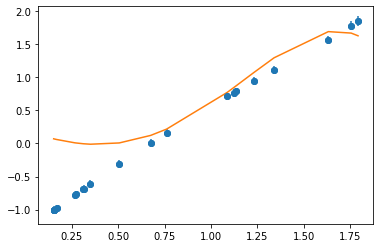

In [ ]:
#N=20 , sU=0.1
n = 20
i = 0
x = []
while i <= 2:
    x.append(random.uniform(0,2))  #training set here is 20 randomly selected points in [0,2]
    i = i + 2/(n-1)
x = np.sort(x)    #sorting the x vector to make it easier to plot
y = []
y_true=[]  #will plot the true model as well for comparison
for i in x:
    y.append(0.2 -1*i + 0.9*(i**2) + 0.7*(i**3) - 0.2*(i**5) + np.random.normal(0, math.sqrt(0.1)))  #training y vector generated same as previous questions
    y_true.append(0.2 -1*i + 0.9*(i**2) + 0.7*(i**3) - 0.2*(i**5))
a = []
for i in range(n):
    a.append([x[i]**0, x[i], x[i]**2, x[i]**3, x[i]**5])  #creating Φ matrix
a_m = np.array(a)
a_tp = a_m.transpose()
u0 = [-10.54 , 0.465, 0.0087 , 0.093, 0.004]  #mean of G(θ) which encodes our prior knowledge about θ
sU = 0.1   #sU=σθ^2
sH = 0.05  #sH=ση^2
ident = np.identity(5)  #identity matrix 5x5, as Φ has 5 columns

mean_u = u0 + np.matmul((1/sH*np.matmul(inv(1/sH*ident+ 1/sH*np.matmul(a_tp,a_m)),a_tp)),(y - np.matmul(a_m,u0)))   #eq 12.20
cov_pr = inv(1/sH*ident+ 1/sH*np.matmul(a_tp,a_m)) #eq 12.19
#mean_u and cov_pr is the estimate for the posterior distr. mean and variance will be used to make a prediction about y

y_pred = []
cov_pred = []
x_plot = []
for i in range(n):
    a_pred = [x[i]**0, x[i], x[i]**2, x[i]**3, x[i]**5]  #here a_pred is the same as φ(x)
    a_m_pred = np.array(a_pred)
    a_pred_tp = a_m_pred.transpose()
    y_pred.append(np.matmul(a_m_pred, mean_u))
    cov_pred.append(sH + np.matmul(np.matmul(a_pred_tp,cov_pr),a_m_pred))
    x_plot.append(x[i])

mse = 0
for i in range(n):
   mse = mse + (y_pred[i] - y_true[i])**2
mse = mse/n
print("MSE:", mse)

plt.scatter(x,y_pred)
plt.errorbar(x,y_pred, yerr = cov_pred, fmt='o')
plt.plot(x,y_true)
plt.show()


MSE: 0.8854188198602045


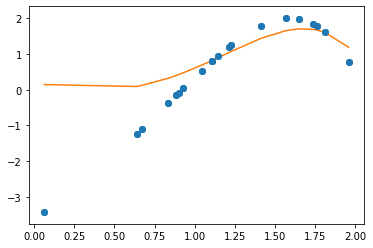

In [ ]:
#N=20 , sU=2
n = 20
i = 0
x = []
while i <= 2:
    x.append(random.uniform(0,2))  #training set here is 20 randomly selected points in [0,2]
    i = i + 2/(n-1)
x = np.sort(x)    #sorting the x vector to make it easier to plot
y = []
y_true=[]  #will plot the true model as well for comparison
for i in x:
    y.append(0.2 -1*i + 0.9*(i**2) + 0.7*(i**3) - 0.2*(i**5) + np.random.normal(0, math.sqrt(0.1)))  #training y vector generated same as previous questions
    y_true.append(0.2 -1*i + 0.9*(i**2) + 0.7*(i**3) - 0.2*(i**5))
a = []
for i in range(n):
    a.append([x[i]**0, x[i], x[i]**2, x[i]**3, x[i]**5])  #creating Φ matrix
a_m = np.array(a)
a_tp = a_m.transpose()
u0 = [-10.54 , 0.465, 0.0087 , 0.093, 0.004]  #mean of G(θ) which encodes our prior knowledge about θ
sU = 2   #sU=σθ^2
sH = 0.05  #sH=ση^2
ident = np.identity(5)  #identity matrix 5x5, as Φ has 5 columns

mean_u = u0 + np.matmul((1/sH*np.matmul(inv(1/sH*ident+ 1/sH*np.matmul(a_tp,a_m)),a_tp)),(y - np.matmul(a_m,u0)))   #eq 12.20
cov_pr = inv(1/sH*ident+ 1/sH*np.matmul(a_tp,a_m)) #eq 12.19
#mean_u and cov_pr is the estimate for the posterior distr. mean and variance will be used to make a prediction about y

y_pred = []
cov_pred = []
x_plot = []
for i in range(n):
    a_pred = [x[i]**0, x[i], x[i]**2, x[i]**3, x[i]**5]  #here a_pred is the same as φ(x)
    a_m_pred = np.array(a_pred)
    a_pred_tp = a_m_pred.transpose()
    y_pred.append(np.matmul(a_m_pred, mean_u))
    cov_pred.append(sH + np.matmul(np.matmul(a_pred_tp,cov_pr),a_m_pred) )
    x_plot.append(x[i])

mse = 0
for i in range(n):
   mse = mse + (y_pred[i] - y_true[i])**2
mse = mse/n
print("MSE:", mse)

plt.scatter(x,y_pred)
plt.errorbar(x,y_pred, yerr = cov_pred, fmt='o')
plt.plot(x,y_true)
plt.show()

MSE: 0.007362694675638507


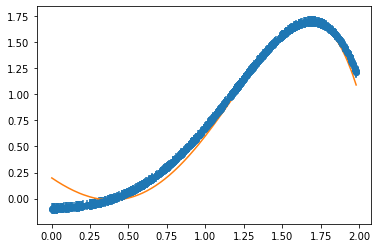

In [ ]:
#N=500 , sU=0.1
n = 500
i = 0
x = []
while i <= 2:
    x.append(random.uniform(0,2))  #training set here is 500 randomly selected points in [0,2]
    i = i + 2/(n)
x = np.sort(x)    #sorting the x vector to make it easier to plot
y = []
y_true=[]  #will plot the true model as well for comparison
for i in x:
    y.append(0.2 -1*i + 0.9*(i**2) + 0.7*(i**3) - 0.2*(i**5) + np.random.normal(0, math.sqrt(0.1)))  #training y vector generated same as previous questions
    y_true.append(0.2 -1*i + 0.9*(i**2) + 0.7*(i**3) - 0.2*(i**5))
a = []
for i in range(n):
    a.append([x[i]**0, x[i], x[i]**2, x[i]**3, x[i]**5])  #creating Φ matrix
a_m = np.array(a)
a_tp = a_m.transpose()
u0 = [-10.54 , 0.465, 0.0087 , 0.093, 0.004]  #mean of G(θ) which encodes our prior knowledge about θ
sU = 0.1   #sU=σθ^2
sH = 0.05  #sH=ση^2
ident = np.identity(5)  #identity matrix 5x5, as Φ has 5 columns

mean_u = u0 + np.matmul((1/sH*np.matmul(inv(1/sH*ident+ 1/sH*np.matmul(a_tp,a_m)),a_tp)),(y - np.matmul(a_m,u0)))   #eq 12.20
cov_pr = inv(1/sH*ident+ 1/sH*np.matmul(a_tp,a_m)) #eq 12.19
#mean_u and cov_pr is the estimate for the posterior distr. mean and variance will be used to make a prediction about y

y_pred = []
cov_pred = []
x_plot = []
for i in range(n):
    a_pred = [x[i]**0, x[i], x[i]**2, x[i]**3, x[i]**5]  #here a_pred is the same φ(x)
    a_m_pred = np.array(a_pred)
    a_pred_tp = a_m_pred.transpose()
    y_pred.append(np.matmul(a_m_pred, mean_u))
    cov_pred.append(sH + np.matmul(np.matmul(a_pred_tp,cov_pr),a_m_pred) )
    x_plot.append(x[i])

mse = 0
for i in range(n):
   mse = mse + (y_pred[i] - y_true[i])**2
mse = mse/n
print("MSE:", mse)

plt.scatter(x,y_pred)
plt.errorbar(x,y_pred, yerr = cov_pred, fmt='o')
plt.plot(x,y_true)
plt.show()

MSE: 0.004551199659864356


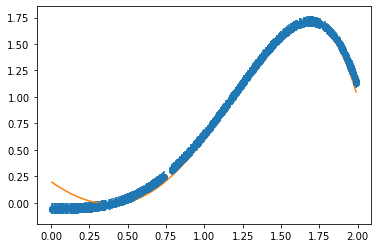

In [ ]:
#N=500 , sU=2
n = 500
i = 0
x = []
while i <= 2:
    x.append(random.uniform(0,2))  #training set here is 500 randomly selected points in [0,2]
    i = i + 2/(n)
x = np.sort(x)    #sorting the x vector to make it easier to plot
y = []
y_true=[]  #will plot the true model as well for comparison
for i in x:
    y.append(0.2 -1*i + 0.9*(i**2) + 0.7*(i**3) - 0.2*(i**5) + np.random.normal(0, math.sqrt(0.1)))  #training y vector generated same as previous questions
    y_true.append(0.2 -1*i + 0.9*(i**2) + 0.7*(i**3) - 0.2*(i**5))
a = []
for i in range(n):
    a.append([x[i]**0, x[i], x[i]**2, x[i]**3, x[i]**5])  #creating Φ matrix
a_m = np.array(a)
a_tp = a_m.transpose()
u0 = [-10.54 , 0.465, 0.0087 , 0.093, 0.004]  #mean of G(θ) which encodes our prior knowledge about θ
sU = 2   #sU=σθ^2
sH = 0.05  #sH=ση^2
ident = np.identity(5)  #identity matrix 5x5, as Φ has 5 columns

mean_u = u0 + np.matmul((1/sH*np.matmul(inv(1/sH*ident+ 1/sH*np.matmul(a_tp,a_m)),a_tp)),(y - np.matmul(a_m,u0)))   #eq 12.20
cov_pr = inv(1/sH*ident+ 1/sH*np.matmul(a_tp,a_m)) #eq 12.19
#mean_u and cov_pr is the estimate for the posterior distr. mean and variance will be used to make a prediction about y

y_pred = []
cov_pred = []
x_plot = []
for i in range(n):
    a_pred = [x[i]**0, x[i], x[i]**2, x[i]**3, x[i]**5]  #here a_pred is the same as φ(x)
    a_m_pred = np.array(a_pred)
    a_pred_tp = a_m_pred.transpose()
    y_pred.append(np.matmul(a_m_pred, mean_u))
    cov_pred.append(sH + np.matmul(np.matmul(a_pred_tp,cov_pr),a_m_pred) )
    x_plot.append(x[i])

mse = 0
for i in range(n):
   mse = mse + (y_pred[i] - y_true[i])**2
mse = mse/n
print("MSE:", mse)

plt.scatter(x,y_pred)
plt.errorbar(x,y_pred, yerr = cov_pred, fmt='o')
plt.plot(x,y_true)
plt.show()

We got the best model (best referring to greater fit on the data) when performing the experiment using N=500 and sU=2, as it was expected.

In general, we know when the number of training samples is small with respect to the number of the unknown parameters, the available information is
not enough to “reveal” a sufficiently good model, which fits the
data, and it can be misleading due to the presence of the noise
and possible outliers. In our case, we can see that by increasing the number of the training data points, N, to 500 we produce better results than by using N=20 data points.

Now for the variance, it is understood by the Bias - Variance Tradeoff that for a fixed number of training points N in the data sets, trying to minimize the variance term results in an increase of the bias term.
Making the variance sU=0.1 results in higher bias than the case of sU=2, and as we can observe on our graphs more data points lie outside the line on the case of sU=0.1 than in the case of sU=2. In contrast, choosing the variance as 2, results in low bias, and we can notice that the corresponding curve goes through most of the data points. By simultaneously increasing the number of points and the variance, however, the possibility of overfitting also increases. Overfitting occurs if the estimated parameters of the unknown
model learn too much about the idiosyncrasies of the specific
training data set, and the model performs badly when it deals
with another set of data, other than the one used for the training. This means that, in our case, the model that performs best for our training set (N=500, sU=2) may not perform well when we test it on another set of data.

## PROBLEM 1 QUESTION 6

In this problem we will try to estimate the values of a,b by updating them iteratively according to our training set. The question only asks for b estimate, but a will be used as well. No convergenge criterion is selected, the algorithm just iterates a number of times. It seems that after a few iterations it converges anyway.

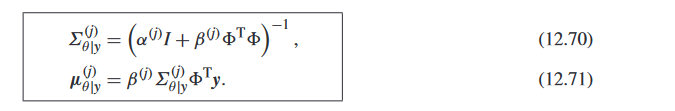

Κ = 2
trace and norm functions are built in numpy.


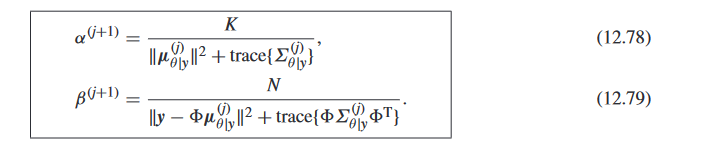

In [ ]:
ident = np.identity(5)  #identity matrix is 5x5 same as Φ*Φ_transpose
n = 500
k = 2 #k refers to the dimensionality of the problem
i = 0
x = []
while i <= 2:  #creating x vector as usual
    x.append(i)
    i = i + 2/(n)
value_list = [] #this is a list of lists. each list element stores the different values of x for every exponent in the polynomial model
for i in range(n):
    value_list.append([x[i]**0,  x[i], x[i]**2, x[i]**3, x[i]**5])
a_m = np.array(value_list)    #convert list into a numpy array for calculations
a_tp = a_m.transpose()
y = []
for i in x:
    y.append(0.2 -1*i + 0.9*(i**2) + 0.7*(i**3) - 0.2*(i**5) + np.random.normal(0, math.sqrt(0.05))) #sH^2 = 0,05 our initial guess. y stores values generated given the x vector


a=1 #algorithm initilization
b=1


for i in range(100): #100 iterations are used arbitrarily but the algorithm seems to converge in less than 10
    cov_m = inv((a*ident)+b*np.matmul(a_tp,a_m))   #12.70 equation expression
    mean_m = b*np.matmul(np.matmul(cov_m, a_tp),y) #12.71

    a_new = k/(np.linalg.norm(mean_m)**2 + np.trace(cov_m))   #12.78
    b_new = n/(np.linalg.norm(y-np.matmul(a_m,mean_m))+ np.trace(np.matmul(np.matmul(a_m,cov_m),a_tp)))  #12.79

    a = a_new #updating the values in each iteration
    b = b_new
print('Noice variance estimate:', 1/b)


Noice variance estimate: 0.009983778070660419


## PROBLEM 1 QUESTION 7

In Experiment 1, the Least Squares method is used to estimate the parameter vector of a 5th degree polynomial model with white Gaussian noise. The Mean Square Error (MSE) is calculated for the training and test sets, and the results show that the MSE for the test set is higher than that for the training set. This means that the model performs well on the training data but not as well on the unseen test data. This is likely due to overfitting, as the model is too complex and has too many parameters for the amount of training data available.

In Experiment 2, the Least Squares method is used with 2nd and 10th degree polynomials and the results are compared. The MSE for the 2nd degree polynomial is higher, while the MSE for the 10th degree polynomial is lower, indicating that the latter has lower bias but higher variance. This is a classic example of the bias-variance tradeoff, where a more complex model (10th degree polynomial) has lower bias but higher variance, while a simpler model (2nd degree polynomial) has higher bias but lower variance. The key is to find the right balance between bias and variance that results in the best overall performance.

In Experiment 3, Ridge Regression is used instead of the Least Squares method and different values of lambda are tested. It is observed that for certain values of lambda, such as lambda = 10^(-1), the MSE is improved. This is because Ridge Regression is a regularization method that helps to prevent overfitting by adding a penalty term to the cost function. By adjusting the value of lambda, we can control the amount of regularization applied, and find the value that results in the best performance.

In Experiment 4, full Bayesian Inference is used with a Gaussian prior for the unknown parameter vector and the true model structure. The estimates of y and their errors are plotted for 20 randomly selected test set points and for two different values of the noise variance (0.05 and 0.15). The key advantage of using Bayesian Inference in this experiment is that it allows us to incorporate prior knowledge about the parameter vector. This can provide more robust and reliable estimates of the model's performance than other methods, such as the Least Squares method and Ridge Regression, which provide point estimates of the parameters. By comparing the results for two different values of the noise variance (0.05 and 0.15), it can be seen that the Bayesian Inference method is more robust to noise than other methods. This is because the Bayesian approach provides a full distribution over the parameters, which can help to account for the uncertainty caused by the noise.

In Experiment 5, the same method as in experiment 4 is used, but with a different mean vector for the prior distribution, which can affect the results. The experiment is repeated four times, using two different values for the variance of the prior distribution (0.1 and 2) and two different values for the number of training samples (20 and 500). The results show that the MSE for the test set is significantly lower when a larger number of training samples (N = 500) is used, regardless of the value of the variance of the prior distribution. This is expected, as a larger amount of training data allows the model to better estimate the true underlying relationship between the input and output variables. Also, the MSE for the test set is lower when a larger variance of the prior distribution is used (sU = 2). The variance of the prior distribution is an important factor because it determines how much prior knowledge is incorporated into the model. A smaller variance of the prior distribution implies that the prior information is more accurate, and this can result in a lower MSE on the test set. However, it's worth noting that there is a tradeoff between the variance of the prior distribution and the number of training samples, a smaller variance of the prior distribution with smaller number of training samples may perform better than a larger variance with a larger number of training samples, or vice versa.

In summary, the experiments indicate that Bayesian Inference can provide more robust and reliable estimates of the model's performance than other methods, and it's more robust to noise. Additionally, it can provide a full distribution over the parameters, which can be useful in other applications such as decision making or uncertainty quantification. Experiments 4 and 5 demonstrate the importance of the choice of the model structure, the amount of training data available, and the presence of regularization in terms of the performance of the model.

## PROBLEM 2 QUESTION 1

Mounting Google Drive in the Colab environment.

Creating a corpus from text files by using PlaintextCorpusReader(). '/content/drive/MyDrive' indicates where to find the text files, and '.*' to include all of them. To confirm the corpus has been constituted, we call the fileids() method to list the files contained within the corpus.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import nltk
from nltk.corpus import PlaintextCorpusReader
corpus=PlaintextCorpusReader('/content/drive/MyDrive','.*')

Mounted at /content/drive


## i) For Iris Plant Database

Importing the dataset and converting it into a dataframe.



In [ ]:
import pandas as pd
irisdata = pd.read_csv('/content/drive/MyDrive/UCIdata-exercise1/iris.data', sep=',',header=None)
irisdf = pd.DataFrame(irisdata)
irisdf = irisdf.dropna() # Delete potential missing values
irisdf.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Each row in this dataset refers to a different Iris plant. It can be seen as a vector that contains the following information about each plant:
1. sepal length in cm (1st column)
2. sepal width in cm (2nd column)
3. petal length in cm (3rd column)
4. petal width in cm (4th column)
5. class: *Iris setosa*, *Iris versicolour* or *Iris virginica*

We are now going to rename each column and calculate some statistical data for each column that contains numerical data.


In [ ]:
irisdf.columns = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Class']
irisdf.describe()

,Sepal Length,Sepal Width,Petal Length,Petal Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


The first modification that is required in order to manipulate the dataset is to convert the class column to a column containing integer values. Each class will be represented by a specific number.

Iris-setosa: 1

Iris-virginica: 2

Iris-versicolor: 3

In [ ]:
irisdf = irisdf.replace(['Iris-setosa','Iris-virginica','Iris-versicolor'],[1,2,3])
print(irisdf)

     Sepal Length  Sepal Width  Petal Length  Petal Width  Class
0             5.1          3.5           1.4          0.2      1
1             4.9          3.0           1.4          0.2      1
2             4.7          3.2           1.3          0.2      1
3             4.6          3.1           1.5          0.2      1
4             5.0          3.6           1.4          0.2      1
..            ...          ...           ...          ...    ...
145           6.7          3.0           5.2          2.3      2
146           6.3          2.5           5.0          1.9      2
147           6.5          3.0           5.2          2.0      2
148           6.2          3.4           5.4          2.3      2
149           5.9          3.0           5.1          1.8      2

[150 rows x 5 columns]


The datafranme is ordered by the class of the data. This means that rows 0-49 of the dataframe are  observations of plants of the Iris-setosa class, while rows 50-99 are plants belonging to the Iris-versicolor class and rows 100-149 refer to plants from the Iris-virginica class.

We will use k fold cross validation on our dataset. We chose k to be 5, as it has been found through experimentation that selecting k to be 5 often results in sufficiently good results.

Firstly, we will shuffle the dataset and split into k number of subsamples equal in size (30 observations).
In the each iteration, one subset is used as the test data while all the other subsets are considered as the training data.
Then, we will train the model with the training data and evaluate it using the test subset. Each time we will compute the correct classification percentage and the total correct classification percentage will be the average of all these individual percentages.


In [ ]:
irisdf=np.random.permutation(irisdf)  #Randomizing the data

#We will divide data into k folds and repeat the process for each fold, then average the accuracy across all the folds to get the f

fold=[]
#We will do 5-fold cross validation
fold1 = irisdf[0:29,]
fold2 = irisdf[30:59,]
fold3 = irisdf[60:89,]
fold4 = irisdf[90:119,]
fold5 = irisdf[120:149,]

train=[]
test=[]
train.append(np.concatenate((fold2, fold3, fold4, fold5)))
test.append(fold1)

train.append(np.concatenate((fold1, fold3, fold4, fold5)))
test.append(fold2)

train.append(np.concatenate((fold1, fold2, fold4, fold5)))
test.append(fold3)

train.append(np.concatenate((fold1, fold2, fold3, fold5)))
test.append(fold4)

train.append(np.concatenate((fold1, fold2, fold3, fold4)))
test.append(fold5)

In order to measure the distance between two vectors we will be using the Euclidean distance measure.

Euclidean Distance = sqrt(sum i to N (x1_i – x2_i)^2)

Where x1 is the first row of data, x2 is the second row of data and i is the index to a specific column as we sum across all columns.

The function euclidean_distance() displayed below calculates exactly this distance.

In [ ]:
import math

def euclidean_distance(x1, x2):
 dist = 0
 for i in range(3):
   dist = dist + (x1[i] - x2[i])**2
 dist = math.sqrt(dist)
 return dist

We want to implement a function that locates the neighbors for a piece of data within a dataset. We must first calculate the distance between each vector in the dataset to this piece of data. We can do this using our euclidean distance function.

Once distances are calculated, we must sort all of the vectors in the training dataset by their distance to the new data. We can then select the top k to return as the most similar neighbors.

Below is a function named nearest_neighbors() that implements this.

In [ ]:
def nearest_neighbors(train, test_row, num_neighbors):
 distances = list()
 for train_row in train:
   distance = euclidean_distance(test_row, train_row)
   distances.append((train_row, distance))
   distances.sort(key=lambda tup: tup[1])
 neighbors = list()
 for i in range(num_neighbors):
   neighbors.append(distances[i][0])
 return neighbors

The function predicted_classification returns the class of the majority of the neighbors for each piece of data.

In [ ]:
def predicted_classification(train, test_row, num_neighbors):
 neighbors = nearest_neighbors(train, test_row, num_neighbors)
 output_values = [row[-1] for row in neighbors]
 prediction = max(set(output_values), key=output_values.count)
 return prediction

Now we develop the correctclassificationpercentage function in order to calculate the percentage of test data that the algorithm classifies correctly.

In [ ]:
def correctclassificationpercentage(train, test, num_neighbors):
  pred=[]
  correctclassification_num = 0
  for x in range(len(test)):
    prediction = predicted_classification(train, test[x], num_neighbors)
    if test[x][-1] == prediction:
      correctclassification_num += 1
  percentage = correctclassification_num/len(test)*100
  return percentage

Calculating the percentage of correct classification for our case for different numbers of neighbours.

In [ ]:
#Using K-Nearest Neighbours on the dataset for different numbers of neighbours

for numofneighbors in range(1,11):
  totalperformance=0
  for i in range(5):
    performance = correctclassificationpercentage(train[i], test[i], numofneighbors)
    totalperformance = totalperformance + performance
  totalperformance = totalperformance/5
  print('The percentage of correct classification when the number of nearest neighbours is ' +str(numofneighbors) + ' is ' + str(totalperformance) + ' %')

The percentage of correct classification when the number of nearest neighbours is 1 is 94.48275862068965 %
The percentage of correct classification when the number of nearest neighbours is 2 is 95.17241379310344 %
The percentage of correct classification when the number of nearest neighbours is 3 is 95.17241379310346 %
The percentage of correct classification when the number of nearest neighbours is 4 is 96.55172413793102 %
The percentage of correct classification when the number of nearest neighbours is 5 is 95.86206896551724 %
The percentage of correct classification when the number of nearest neighbours is 6 is 95.17241379310344 %
The percentage of correct classification when the number of nearest neighbours is 7 is 95.86206896551724 %
The percentage of correct classification when the number of nearest neighbours is 8 is 96.55172413793102 %
The percentage of correct classification when the number of nearest neighbours is 9 is 95.86206896551724 %
The percentage of correct classificat

## ii) For	Pima Indians Diabetes Database

Following the same process for the Pima Indians Diabetes Database

In [ ]:
pimadata = pd.read_csv('/content/drive/MyDrive/UCIdata-exercise1/pima-indians-diabetes.data', sep=',',header=None)
#pimadata = pd.read.csv('pima-indians-diabetes.data')
pimadf = pd.DataFrame(pimadata)
pimadf = pimadf.dropna() # Delete potential missing values
pimadf.columns = ['Number of times pregnant', 'Plasma glucose concentration a 2 hours in an oral glucose tolerance test', 'Diastolic blood pressure', 'Triceps skin fold thickness', '2-Hour serum insulin', 'Body mass index', 'Diabetes pedigree function', 'Age', 'Class variable']
pimadf.head()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age,Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Since the range of values of raw data of the Pima Indians Diabetes database varies widely, we will normalize the range of features of data using min-max normalization. The general formula for a min-max of [0, 1] that the following function MinMaxScaler() uses is:

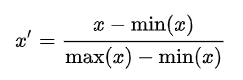

In [ ]:
from sklearn.preprocessing import MinMaxScaler

pimadf = MinMaxScaler().fit_transform(pimadf)
print(pimadf)

[[0.35294118 0.74371859 0.59016393 ... 0.23441503 0.48333333 1.        ]
 [0.05882353 0.42713568 0.54098361 ... 0.11656704 0.16666667 0.        ]
 [0.47058824 0.91959799 0.52459016 ... 0.25362938 0.18333333 1.        ]
 ...
 [0.29411765 0.6080402  0.59016393 ... 0.07130658 0.15       0.        ]
 [0.05882353 0.63316583 0.49180328 ... 0.11571307 0.43333333 1.        ]
 [0.05882353 0.46733668 0.57377049 ... 0.10119556 0.03333333 0.        ]]


In [ ]:
pimadf.shape

(768, 9)

In [ ]:
pimadf=np.random.permutation(pimadf)  #Randomizing the data

fold=[]
#We will do 5-fold cross validation
fold1 = pimadf[0:153, ]
fold2 = pimadf[154:307, ]
fold3 = pimadf[308:461, ]
fold4 = pimadf[462:614, ]
fold5 = pimadf[615:767, ]

train=[]
test=[]
train.append(np.concatenate((fold2, fold3, fold4, fold5)))
test.append(fold1)

train.append(np.concatenate((fold1, fold3, fold4, fold5)))
test.append(fold2)

train.append(np.concatenate((fold1, fold2, fold4, fold5)))
test.append(fold3)

train.append(np.concatenate((fold1, fold2, fold3, fold5)))
test.append(fold4)

train.append(np.concatenate((fold1, fold2, fold3, fold4)))
test.append(fold5)


for numofneighbors in range(1,11):
  totalperformance=0
  for i in range(5):
    performance = correctclassificationpercentage(train[i], test[i], numofneighbors)
    totalperformance = totalperformance + performance
  totalperformance = totalperformance/5
  print('The percentage of correct classification when the number of nearest neighbours is ' +str(numofneighbors) + ' is ' + str(totalperformance) + ' %')


The percentage of correct classification when the number of nearest neighbours is 1 is 67.10612315101478 %
The percentage of correct classification when the number of nearest neighbours is 2 is 70.64069487444101 %
The percentage of correct classification when the number of nearest neighbours is 3 is 71.03715170278637 %
The percentage of correct classification when the number of nearest neighbours is 4 is 72.73649810801513 %
The percentage of correct classification when the number of nearest neighbours is 5 is 71.55830753353973 %
The percentage of correct classification when the number of nearest neighbours is 6 is 73.1329549363605 %
The percentage of correct classification when the number of nearest neighbours is 7 is 72.73993808049536 %
The percentage of correct classification when the number of nearest neighbours is 8 is 71.56002751977982 %
The percentage of correct classification when the number of nearest neighbours is 9 is 72.6109391124871 %
The percentage of correct classificatio

## PROBLEM 2 QUESTION 2

We will now use Maximum Likelihood Estimation to obtain estimates of the probability density functions (PDFs) for each class in a dataset, assuming the PDFs are Gaussian and the covariance matrices are diagonal with all diagonal elements equal (part a):


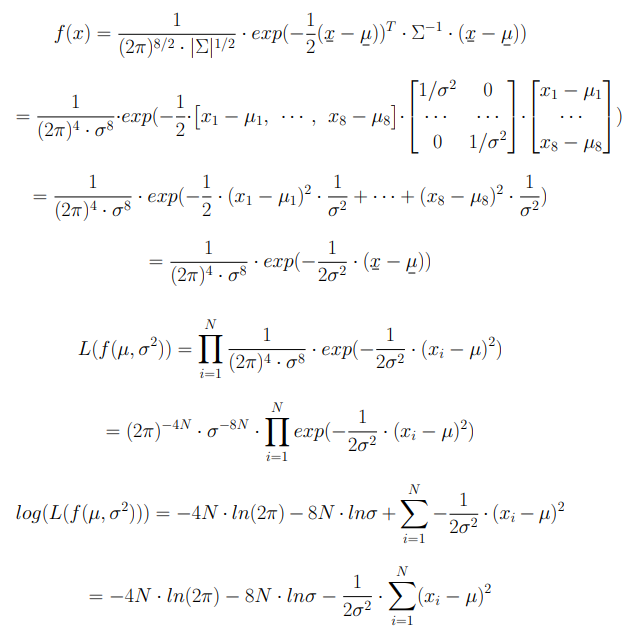

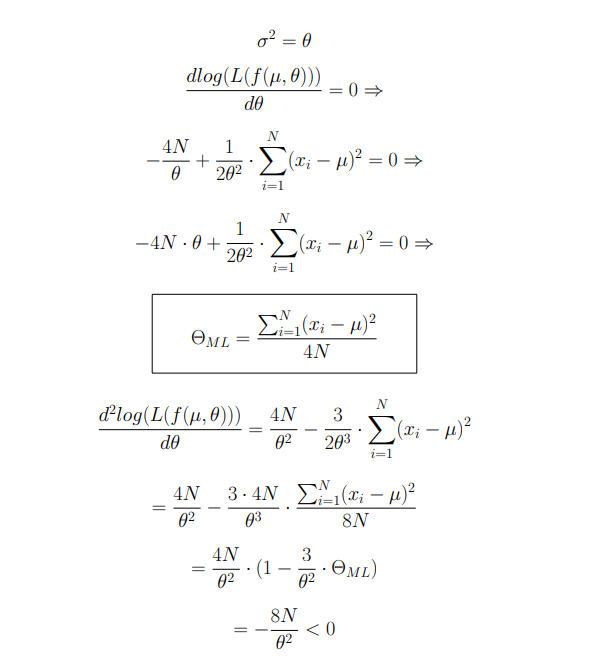

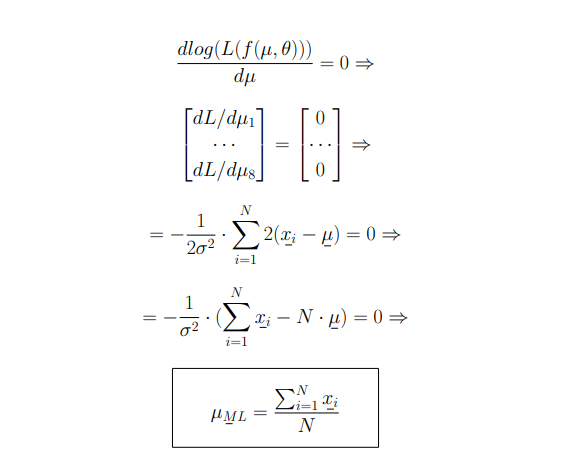

In [ ]:
x_class=[]   #Seperating the two classes.
for i in range(2):
  x_class.append(pimadf[:,0:8][pimadf[:,8]==i])

means=[]   #Calculating an estimation for the mean for each class based on ML Estimation.
for cl in range(2):
  mean = []
  for j in range(8):
    m = 0
    for i in range(x_class[cl].shape[0]):
      m = m + x_class[cl][i][j]
    m=m/x_class[cl].shape[0]
    mean.append(m)
  means.append(mean)

var = []   #Calculating an estimation for the variance for each class based on ML Estimation.
for cl in range(2):
  v=0
  for j in range(8):
    for i in range(x_class[cl].shape[0]):
      v = v + (x_class[cl][i][j] - means[cl][j])**2
  v = v/(4*x_class[cl].shape[0])
  var.append(v*np.identity(8))

For part b, the mean remains the same, but now the covariance matrices are non-diagonal, so we will use Maximum Likelihood Estimation again in order to estimate them. The estimation for the covariance matrices that results from the Maximum Likelihood Estimation method is the following:

In [ ]:
covs = []   #Calculating an estimation for the covariance matrices for each class.
for cl in range(2):
  covmat = []
  for j in range(8):
    cov = []
    for k in range(8):
      c = 0
      for i in range(x_class[cl].shape[0]):
        c = c + (x_class[cl][i][j] - means[cl][j])*(x_class[cl][i][k] - means[cl][k])
      c = c/x_class[cl].shape[0]
      cov.append(c)
    covmat.append(cov)
  covs.append(covmat)

For part c) the components of the feature vectors are mutually statistically independent and the marginal pdfs are gaussian, thus we have the following:

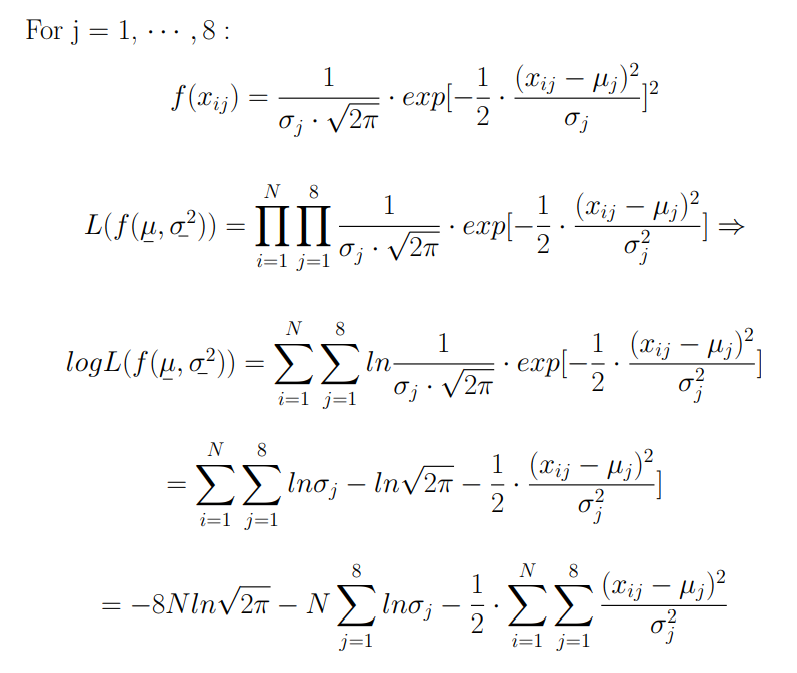


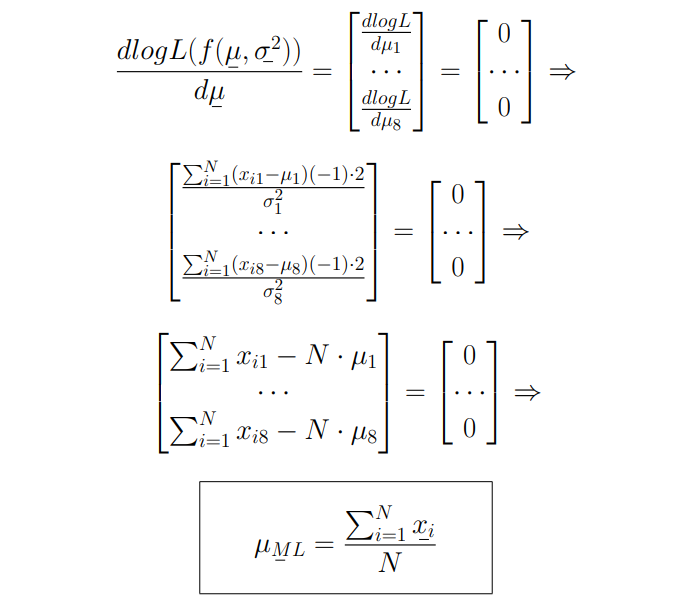


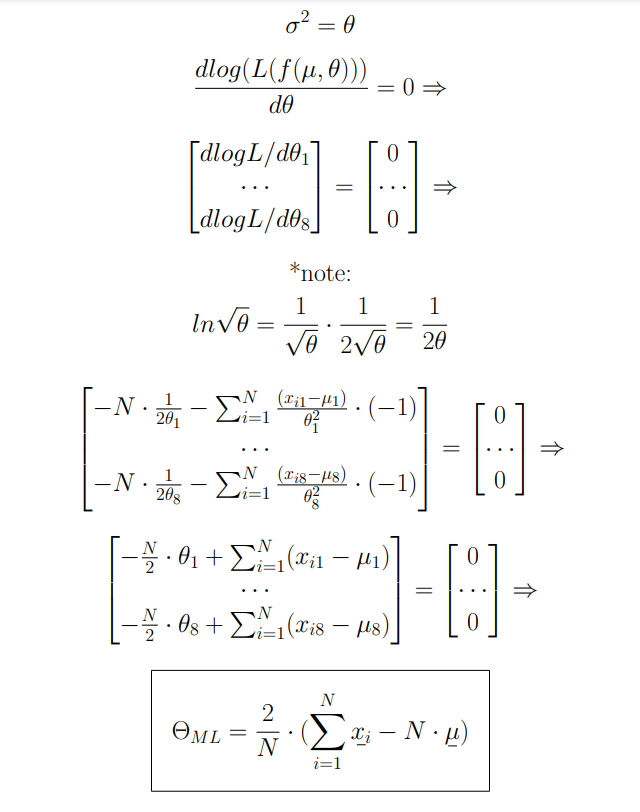


The mean remains obviously the same as in parts a and b.

For the variance, due to the independence of the features, we have that each feature has a different variance and the covariances are 0. Thus, we have the following:

In [ ]:
vars = []   #Calculating an estimation for the variance for each class based on ML Estimation. We will get 2 1x8 vectors containing the variances of each one of the 8 features for the 2 classes.
for cl in range(2):
  var = []
  for j in range(8):
    v = 0
    for i in range(x_class[cl].shape[0]):
      v = v + x_class[cl][i][j] - means[cl][j]
    v = 2*v/(x_class[cl].shape[0])
    var.append(v)
  vars.append(var)

part d

In [ ]:
#needs more work
N = 768

def parzen_1d(h, data, x):
    gaussian_results = [(1/(np.sqrt(2*np.pi)*h))*np.exp(-((x-x_i)**2)/(2(h^2))) for x_i in data]
    return np.average(gaussian_results)

def parzen_multivariate(h, data, x):
    gaussian_results = [(1/(np.sqrt(2*np.pi)*h))*np.exp(-(((x-x_i).transpose())@(x-x_i))/(2(h^2))) for x_i in data]
    return np.average(gaussian_results)

print(parzen_1d(np.sqrt(N), pd.DataFrame(pimadf[0]).iloc[:, :-1], pd.DataFrame(pimadf[1]).iloc[0, :-1]))
#print(parzen_1d(np.sqrt(N), pd.DataFrame().iloc[:, :-1], pd.DataFrame().iloc[0, :-1]))

nan


<>:5: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
<>:9: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
<>:5: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
<>:9: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
<ipython-input-39-506b7ce4d551>:5: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
  gaussian_results = [(1/(np.sqrt(2*np.pi)*h))*np.exp(-((x-x_i)**2)/(2(h^2))) for x_i in data]
<ipython-input-39-506b7ce4d551>:9: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
  gaussian_results = [(1/(np.sqrt(2*np.pi)*h))*np.exp(-(((x-x_i).transpose())@(x-x_i))/(2(h^2))) for x_i in data]
/usr/local/lib/python3.8/dist-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  r

## PROBLEM 2 QUESTION 3

Here is an example of how to implement a Bayes classifier and compute its classification accuracy using cross validation for the first assumption about the PDFs (part a, assuming the PDFs are Gaussian and the covariance matrices are diagonal with all diagonal elements equal): Firstly, in our example, the **fit** method estimates the mean and variance of the feature vectors for each class, and the **predict** method uses these estimates to compute the likelihood of a test sample belonging to each class. Then it splits the data into a training set and a test set, and uses the classifier to make predictions on the test set. Finally, it computes the classification accuracy by comparing the predicted labels to the true labels.

In [ ]:
class BayesClassifier:
    def __init__(self):
        self.class_params = []

    def fit(self, X, y):
        # Iterate over each class
        for i in range(2):
            # Get the feature vectors for the current class
            X_class = X[y == i]

            # Estimate the mean and variance for the current class
            mean = np.mean(X_class, axis=0)
            variance = np.var(X_class, axis=0)

            # Append the estimates to the list
            self.class_params.append((mean, variance))

    def predict(self, X):
        y_pred = []
        for i in range(X.shape[0]):
            x = X.iloc[i,:]
            likelihoods = [np.prod(np.exp(-(x - mean)**2 / (2 * variance)) / np.sqrt(2 * np.pi * variance)) for mean, variance in self.class_params]

            # Assign the class with the highest likelihood
            y_pred.append(np.argmax(likelihoods))
        return y_pred

pimadf = pd.DataFrame(pimadata)
X, y = pimadf.iloc[:, :-1], pimadf.iloc[:, -1]

# Initialize the Bayes classifier
bayes = BayesClassifier()

# Fit the classifier with the training data
bayes.fit(X, y)

# Split the data into training and test sets
train_prop = 0.8
X_train, X_test = X[:int(train_prop*len(X))], X[int(train_prop*len(X)):]
y_train, y_test = y[:int(train_prop*len(y))], y[int(train_prop*len(y)):]

# Make predictions on the test set
y_pred = bayes.predict(X_test)

# Compute the classification accuracy
accuracy = sum(y_pred == y_test) / len(y_test)
print("Accuracy:", accuracy)


Accuracy: 0.7597402597402597


Here is an example of how to implement a Bayes classifier and compute its classification accuracy using cross validation for the second assumption about the PDFs (part b, assuming the PDFs are gaussian, with non-diagonal covariance matrices): In our example, The **fit** method computes the mean and covariance of the feature vectors for each class and the **predict** method uses these estimates to compute the likelihood of a test sample belonging to each class. Then, it uses k-fold cross validation to train and evaluate the classifier. It splits the data into k equal-sized folds, and for each fold, it uses the other k-1 folds as the training set and the current fold as the test set. Then it computes the accuracy of the classifier for each fold, and the final accuracy of the classifier is the mean of the accuracy for each fold.

In [ ]:
from scipy.stats import multivariate_normal

class BayesClassifier:
    def __init__(self):
        self.class_params = []

    def fit(self, X, y):
        # Iterate over each class
        for i in [0,1]:
            # Get the feature vectors for the current class
            X_class = X[y == i]
            # Compute the mean and covariance of the feature vectors for each class
            mean_values = np.mean(X_class, axis=0)
            cov_matrix = np.cov(X_class.T)
            # Append the estimates to the list
            self.class_params.append([mean_values, cov_matrix])

    def predict(self, X):
        y_pred = []
        for x in X:
            # Compute the likelihood of the data given the estimated parameters for each class
            likelihoods = [multivariate_normal.pdf(x, mean=mean_values, cov=cov_matrix)
                           for mean_values, cov_matrix in self.class_params]
            # Assign the class with the highest likelihood
            y_pred.append(np.argmax(likelihoods))
        return y_pred


# Load the Pima Indian Diabetes data set
pimadata = pd.read_csv('/content/drive/MyDrive/UCIdata-exercise1/pima-indians-diabetes.data', sep=',',header=None)
X, y = pimadata.iloc[:, :-1].values, pimadata.iloc[:, -1].values

# Initialize the Bayes classifier
bayes = BayesClassifier()

# Implementing k-fold cross validation
k = 5
n = len(X)
fold_size = n // k
accuracies = []
for i in range(k):
    X_test = X[i * fold_size:(i + 1) * fold_size]
    y_test = y[i * fold_size:(i + 1) * fold_size]
    X_train = np.concatenate([X[:i * fold_size], X[(i + 1) * fold_size:]])
    y_train = np.concatenate([y[:i * fold_size], y[(i + 1) * fold_size:]])
    bayes.fit(X_train, y_train)
    y_pred = bayes.predict(X_test)
    accuracy = (y_pred == y_test).mean()
    accuracies.append(accuracy)

print("Accuracy:", np.mean(accuracies))


Accuracy: 0.30196078431372547


Here is an example of how to implement a Naive Bayes classifier and compute its classification accuracy using cross validation for the third assumption about the PDFs (part c, assuming that the components of the feature vectors are mutually statistically independent, and the marginal PDFs are Gaussian with parameters estimated using Maximum Likelihood from the available data): In our example, The **fit** method estimates the mean and variance of each feature for each class, and the **predict** method uses these estimates to compute the likelihood of a test sample belonging to each class. It loads the PIMA Indians diabetes dataset, removes any rows with missing values, and splits the dataset into training and test sets. Then it initializes the Naive Bayes classifier, fits it with the training data, make predictions on the test set and computes the classification accuracy by comparing the predicted labels to the true labels.

In [ ]:
from scipy.stats import norm

class NaiveBayesClassifier:
    def __init__(self):
        self.class_params = []

    def fit(self, X, y):
        # Iterate over each class
        for i in range(2):
            # Get the feature vectors for the current class
            X_class = X[y == i]

            # Estimate the mean and variance for each feature
            means = np.mean(X_class, axis=0)
            variances = np.var(X_class, axis=0)
            variances[variances == 0] = 1e-9  # Add small value to variances to avoid division by zero

            # Append the estimates to the list
            self.class_params.append((means, variances))

    def predict(self, X):
        y_pred = []
        for i in range(X.shape[0]):
            x = X.iloc[i,:]
            likelihoods = [np.prod(norm.pdf(x, mean, np.sqrt(variance)))
                           for mean, variance in self.class_params]

            # Assign the class with the highest likelihood
            y_pred.append(np.argmax(likelihoods))
        return y_pred

# Load the PIMA Indians diabetes dataset
pimadata = pd.read_csv('/content/drive/MyDrive/UCIdata-exercise1/pima-indians-diabetes.data', sep=',',header=None, na_values='?')
pimadf = pd.DataFrame(pimadata)
X, y = pimadf.iloc[:, :-1], pimadf.iloc[:, -1]

# Remove any rows with missing values
X.dropna(inplace=True)
y = y[X.index]

# Splitting the dataset into training and test sets
train_prop = 0.8

# Shuffle the data
shuffle_indices = np.random.permutation(len(X))
X, y = X.iloc[shuffle_indices], y[shuffle_indices]

# Split the data into training and test sets
X_train, X_test = X[:int(train_prop*len(X))], X[int(train_prop*len(X)):]
y_train, y_test = y[:int(train_prop*len(y))], y[int(train_prop*len(y)):]

# Initialize the Naive Bayes classifier
naive_bayes = NaiveBayesClassifier()

# Fit the classifier with the training data
naive_bayes.fit(X_train, y_train)

# Make predictions on the test set
y_pred = naive_bayes.predict(X_test)

# Compute the classification accuracy
accuracy = sum(y_pred == y_test) / len(y_test)
print("Accuracy:", accuracy)


Accuracy: 0.7402597402597403


Here is an example of how to implement a Naive Bayes classifier and compute its classification accuracy using cross validation for the fourth assumption about the PDFs (part d, assuming that the components of the feature vectors are mutually statistically independent, and the marginal PDFs are computed using 1-d Parzen windows with Gaussian kernels, with the width h equal to the square root of the number of patterns in the available data): In our example, The **fit** method estimates the mean and standard deviation of each feature for each class, and the **predict** method uses these estimates to compute the likelihood of a test sample belonging to each class. It loads the PIMA Indians diabetes dataset and initializes the Naive Bayes classifier. Then it performs 5-fold cross-validation, where the data is split into 5 equal-sized folds. For each fold, it uses the other 4 folds as the training set, trains the classifier on the training data, and computes the classification accuracy on the test data. Finally, it prints the average accuracy across all the folds.

In [ ]:
# Load the Pima Indian Diabetes data set
pimadata = pd.read_csv('/content/drive/MyDrive/UCIdata-exercise1/pima-indians-diabetes.data', sep=',',header=None)
X = pimadata.iloc[:, :-1].values
y = pimadata.iloc[:, -1].values

class NaiveBayesClassifier:
    def __init__(self):
        self.class_params = []

    def fit(self, X, y):
        # Iterate over each class
        for i in [0,1]:
            # Get the feature vectors for the current class
            X_class = X[y == i]
            # Compute the mean and std of the feature vectors for each class
            mean_values = np.mean(X_class, axis=0)
            std_values = np.std(X_class, axis=0)
            # Append the estimates to the list
            self.class_params.append([mean_values, std_values])

    def predict(self, X):
        y_pred = []
        for x in X:
            # Compute the likelihood of the data given the estimated parameters for each class
            likelihoods = [np.prod(norm.pdf((x-mean_values)/std_values))
                           for mean_values, std_values in self.class_params]
            # Assign the class with the highest likelihood
            y_pred.append(np.argmax(likelihoods))
        return y_pred

# Initialize the Naive Bayes classifier
naive_bayes = NaiveBayesClassifier()

# Initialize variables to store the accuracy scores
scores = []

# Define the number of folds
k = 5

# Compute the indices for each fold
fold_size = int(len(y) / k)
indices = np.arange(len(y))

# Perform 5-fold cross-validation
for i in range(k):
    # Get the indices for the test set
    test_indices = indices[i * fold_size : (i+1) * fold_size]
    # Get the indices for the training set
    train_indices = np.setdiff1d(indices, test_indices)
    # Split the data into train and test set
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]
    # Train the classifier on the training data
    naive_bayes.fit(X_train, y_train)
    # Compute the classification accuracy on the test data
    accuracy = sum(naive_bayes.predict(X_test) == y_test) / len(y_test)
    scores.append(accuracy)

# Print the average accuracy
print("Accuracy:", np.mean(scores))



Accuracy: 0.26013071895424833


## PROBLEM 2 QUESTION 4


The Perceptron is a classification algorithm for problems with two classes, where the two classes are seperated by a linear equation. Οn account of this, we set the *Iris setosa* class as the positive class and the we combine *Iris versicolor* and *Iris virginica* classes to create the negative class, in order to examine whether the *Iris setosa* data are linearly separable from the combined *Iris versicolor* and *Iris virginica* data.

In [ ]:
irisdf = pd.DataFrame(irisdata)
setosadf = irisdf.replace(['Iris-setosa','Iris-virginica','Iris-versicolor'],[1,-1,-1])

We will do 5 - fold cross validation again.

In [ ]:
setosadf = np.random.permutation(setosadf)
fold=[]

fold1 = setosadf[0:29,]
fold2 = setosadf[30:59,]
fold3 = setosadf[60:89,]
fold4 = setosadf[90:119,]
fold5 = setosadf[120:149,]

train=[]
test=[]
train.append(np.concatenate((fold2, fold3, fold4, fold5)))
test.append(fold1)

train.append(np.concatenate((fold1, fold3, fold4, fold5)))
test.append(fold2)

train.append(np.concatenate((fold1, fold2, fold4, fold5)))
test.append(fold3)

train.append(np.concatenate((fold1, fold2, fold3, fold5)))
test.append(fold4)

train.append(np.concatenate((fold1, fold2, fold3, fold4)))
test.append(fold5)

The Perceptron receives training data as input and starting from an initial estimate, w0,
we test each one of the samples. Every time a sample is misclassified, action is
taken for a correction (updating the weights). Otherwise no action is required. Once all samples have been considered, we say
that one epoch has been completed. If no convergence has been attained, all samples are reconsidered in a second epoch, and so on.  



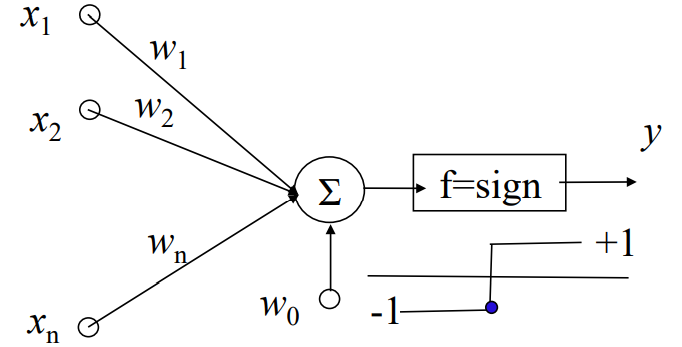


Thus the **perceptron algorithm** becomes:
*  Initialization: Zero initial synaptic weights.
*  We present the training patterns to the network, one by one. For each
pattern, we ask if the output is equal to the desired output.
*   If it is equal, we do nothing.
*   If it is not equal, we add to each synaptic weight a quantity proportional
to the product of the input by the desired output.
*   When all training patterns have been presented to the network, we
repeat the process by presenting the patterns again, one by one.



Firstly, we will implement the weight_updating function that estimates the value of the synaptic weights after a given number of iterations through the training data (epochnum).


In [ ]:
def weight_updating(train, w0, epochnum):
  w = w0
  for epoch in range(epochnum):
    for row in train:
      tx = []
      for index in range(len(row)-1):
        tx.append(row[-1]*row[index])
      txw = np.inner(tx, w)
      if txw <= 0:
        w = np.add(w, tx)
  return w

The perceptronclassification function is used to classify every unknown pattern shown to the network in one of the two classes depending on the output of the network and then the correctclassificationpercentage function calculates the percentage of test data that the algorithm classifies correctly.

In [ ]:
def perceptronclassification(train, x, w0, epochnum):
  w = weight_updating(train, w0, epochnum)
  wx = np.inner(w, x)
  if wx>0:
    cl = 1
  elif wx<0:
    cl = -1
  else:
    print(str(x) + ' is on the decision surface.')
  return cl


def correctclassificationpercentage(train, test, w0, epochnum):
  correctclassification_num = 0
  for test_row in test:
    cl = perceptronclassification(train, test_row[:-1], w0, epochnum)
    if cl==test_row[-1]:
      correctclassification_num += 1
  percentage = correctclassification_num/len(test)*100
  return percentage

We are now using the functions implemented above on our data.

In [ ]:
perc = 0
for i in range(5):
  perc = perc + correctclassificationpercentage(train[i], test[i], [0, 0, 0, 0], 1)
perc=perc/5
print('The percentage of correct classification after 1 iteration of the algorithm is ' + str(perc) + '%')

The percentage of correct classification after 1 iteration of the algorithm is 100.0%


Thus, convergence has been attained from the first epoch, meaning that the data of the *Iris setosa* class are linearly separable from the combined data of *Iris versicolor* and *Iris virginica* classes.

Now, we set the *Iris virginica* class as the positive class and we combine the *Iris setosa* and *Iris versicolor* classes to create the negative class and we repeat the same process.

In [ ]:
print('Considering the Iris-virginica class as positive:')

virginicadf = irisdf.replace(['Iris-setosa','Iris-virginica','Iris-versicolor'],[-1,1,-1])

virginicadf = np.random.permutation(virginicadf)
fold=[]

fold1 = virginicadf[0:29,]
fold2 = virginicadf[30:59,]
fold3 = virginicadf[60:89,]
fold4 = virginicadf[90:119,]
fold5 = virginicadf[120:149,]

train=[]
test=[]
train.append(np.concatenate((fold2, fold3, fold4, fold5)))
test.append(fold1)

train.append(np.concatenate((fold1, fold3, fold4, fold5)))
test.append(fold2)

train.append(np.concatenate((fold1, fold2, fold4, fold5)))
test.append(fold3)

train.append(np.concatenate((fold1, fold2, fold3, fold5)))
test.append(fold4)

train.append(np.concatenate((fold1, fold2, fold3, fold4)))
test.append(fold5)


for n_epoch in range(1,11):
  for i in range(5):
    perc = perc + correctclassificationpercentage(train[i], test[i], [0, 0, 0, 0], 1)
  perc=perc/5
  print('The percentage of correct classification after ' + str(n_epoch) + ' iterations of the algorithm is ' + str(perc) + '%')

Considering the Iris-virginica class as positive:
The percentage of correct classification after 1 iterations of the algorithm is 83.44827586206897%
The percentage of correct classification after 2 iterations of the algorithm is 80.13793103448276%
The percentage of correct classification after 3 iterations of the algorithm is 79.47586206896551%
The percentage of correct classification after 4 iterations of the algorithm is 79.34344827586207%
The percentage of correct classification after 5 iterations of the algorithm is 79.31696551724137%
The percentage of correct classification after 6 iterations of the algorithm is 79.31166896551723%
The percentage of correct classification after 7 iterations of the algorithm is 79.3106096551724%
The percentage of correct classification after 8 iterations of the algorithm is 79.31039779310343%
The percentage of correct classification after 9 iterations of the algorithm is 79.31035542068965%
The percentage of correct classification after 10 iterations

In this case, we cannot further update the weights in order for the algorithm to fully seperate our two classes, meaning that the data of the *Iris virginica* class are not linearly separable from the combined data of *Iris versicolor* and *Iris setosa* classes.


Finally, we repeat the same process for the *Iris versicolor* class as the positive class and the combination of the *Iris setosa* and *Iris virginica* classes as the negative class and we repeat the same process.


In [ ]:
print('Considering the Iris-versicolor class as positive:')

versicolordf = irisdf.replace(['Iris-setosa','Iris-virginica','Iris-versicolor'],[-1,-1,1])

versicolordf = np.random.permutation(versicolordf)
fold=[]

fold1 = versicolordf[0:29,]
fold2 = versicolordf[30:59,]
fold3 = versicolordf[60:89,]
fold4 = versicolordf[90:119,]
fold5 = versicolordf[120:149,]

train=[]
test=[]
train.append(np.concatenate((fold2, fold3, fold4, fold5)))
test.append(fold1)

train.append(np.concatenate((fold1, fold3, fold4, fold5)))
test.append(fold2)

train.append(np.concatenate((fold1, fold2, fold4, fold5)))
test.append(fold3)

train.append(np.concatenate((fold1, fold2, fold3, fold5)))
test.append(fold4)

train.append(np.concatenate((fold1, fold2, fold3, fold4)))
test.append(fold5)

for n_epoch in range(1,11):
  for i in range(5):
    perc = perc + correctclassificationpercentage(train[i], test[i], [0, 0, 0, 0], 1)
  perc=perc/5
  print('The percentage of correct classification is after ' + str(n_epoch) + ' iterations of the algorithm is ' + str(perc) + '%')

Considering the Iris-versicolor class as positive:
The percentage of correct classification is after 1 iterations of the algorithm is 53.1034486995862%
The percentage of correct classification is after 2 iterations of the algorithm is 47.86206905026207%
The percentage of correct classification is after 3 iterations of the algorithm is 46.81379312039725%
The percentage of correct classification is after 4 iterations of the algorithm is 46.60413793442427%
The percentage of correct classification is after 5 iterations of the algorithm is 46.56220689722968%
The percentage of correct classification is after 6 iterations of the algorithm is 46.55382068979077%
The percentage of correct classification is after 7 iterations of the algorithm is 46.55214344830298%
The percentage of correct classification is after 8 iterations of the algorithm is 46.55180800000543%
The percentage of correct classification is after 9 iterations of the algorithm is 46.55174091034591%
The percentage of correct classi

In this case, convergence has not been attained and no further updating of the weights is being made, meaning that the data of the *Iris setosa* class are linearly inseparable from the combined data of *Iris versicolor* and *Iris virginica* classes.